Import Libraries

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

### **Train Data**

In [2]:
train_data = pd.read_csv('Assignment4.1a.csv', parse_dates=['Date'])
print(train_data.shape)
train_data.head(7)

(1873618, 4)


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0
5,2015-01-01,273,9,1
6,2015-01-02,12,9,0


Create all possible store-item-date combinations by filling missing days with "0 sales"

In [3]:
stores = train_data['StoreCode'].unique()
items = train_data['ProductCode'].unique()
dates = pd.date_range(train_data['Date'].min(), train_data['Date'].max())

idx = pd.MultiIndex.from_product([stores, items, dates], names=['StoreCode', 'ProductCode', 'Date'])

# Reindex the original dataframe and move 'Date' column to the front
train_data = train_data.set_index(['StoreCode', 'ProductCode', 'Date']).reindex(idx, fill_value=0).reset_index()[['Date', 'StoreCode', 'ProductCode'] + [col for col in train_data.columns if col not in ['Date', 'StoreCode', 'ProductCode']]]

print(train_data.shape)
train_data.head(7)

(22849360, 4)


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-02,8,9,0
2,2015-01-03,8,9,0
3,2015-01-04,8,9,0
4,2015-01-05,8,9,0
5,2015-01-06,8,9,0
6,2015-01-07,8,9,0


Checking train data

In [4]:
# Check Nulls
train_data.isna().sum()

Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22849360 entries, 0 to 22849359
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   StoreCode      int64         
 2   ProductCode    int64         
 3   SalesQuantity  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 697.3 MB


Add Product Groups

In [6]:
product_groups = pd.read_csv("assignment4.1c.csv")
train_data=pd.merge(train_data,product_groups,on='ProductCode',how='left')
train_data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2
0,2015-01-01,8,9,-1,H,15
1,2015-01-02,8,9,0,H,15
2,2015-01-03,8,9,0,H,15
3,2015-01-04,8,9,0,H,15
4,2015-01-05,8,9,0,H,15


Check for missing values

In [7]:

missing_values = train_data[['ProductGroup1', 'ProductGroup2']].isna().sum()
print(missing_values)

ProductGroup1    0
ProductGroup2    0
dtype: int64


Add Week Number

In [8]:
train_data['week'] = train_data['Date'].dt.isocalendar().week
train_data.head(7)

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,week
0,2015-01-01,8,9,-1,H,15,1
1,2015-01-02,8,9,0,H,15,1
2,2015-01-03,8,9,0,H,15,1
3,2015-01-04,8,9,0,H,15,1
4,2015-01-05,8,9,0,H,15,2
5,2015-01-06,8,9,0,H,15,2
6,2015-01-07,8,9,0,H,15,2


### **Test Data**

In [9]:
test_data = pd.read_csv('Assignment4.1b.csv', parse_dates=['Date'])
print(test_data.shape)
test_data.head(7)

(1028121, 4)


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1
5,2015-08-01,7,20,1
6,2015-08-01,35,20,1


Create all possible store-item-date combinations by filling missing days with "0 sales"

In [10]:
stores = test_data['StoreCode'].unique()
items = test_data['ProductCode'].unique()
dates = pd.date_range(test_data['Date'].min(), test_data['Date'].max())

idx = pd.MultiIndex.from_product([stores, items, dates], names=['StoreCode', 'ProductCode', 'Date'])

# Reindex the original dataframe and move 'Date' column to the front
test_data = test_data.set_index(['StoreCode', 'ProductCode', 'Date']).reindex(idx, fill_value=0).reset_index()[['Date', 'StoreCode', 'ProductCode'] + [col for col in test_data.columns if col not in ['Date', 'StoreCode', 'ProductCode']]]

print(test_data.shape)
test_data.head(7)

(15254624, 4)


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-02,2,9,0
2,2015-08-03,2,9,0
3,2015-08-04,2,9,0
4,2015-08-05,2,9,0
5,2015-08-06,2,9,0
6,2015-08-07,2,9,0


Checking test data

In [11]:
# Check nulls
test_data.isna().sum()

Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15254624 entries, 0 to 15254623
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   StoreCode      int64         
 2   ProductCode    int64         
 3   SalesQuantity  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 465.5 MB


Add Product Groups

In [13]:
test_data=pd.merge(test_data,product_groups,on='ProductCode',how='left')
test_data.head()

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2
0,2015-08-01,2,9,1,H,15
1,2015-08-02,2,9,0,H,15
2,2015-08-03,2,9,0,H,15
3,2015-08-04,2,9,0,H,15
4,2015-08-05,2,9,0,H,15


Check for misisng values

In [14]:
test_data[['ProductGroup1', 'ProductGroup2']].isna().sum()


ProductGroup1    0
ProductGroup2    0
dtype: int64

Add Week Number

In [15]:
test_data['week'] = test_data['Date'].dt.isocalendar().week
test_data.head(7)

,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,week
0,2015-08-01,2,9,1,H,15,31
1,2015-08-02,2,9,0,H,15,31
2,2015-08-03,2,9,0,H,15,32
3,2015-08-04,2,9,0,H,15,32
4,2015-08-05,2,9,0,H,15,32
5,2015-08-06,2,9,0,H,15,32
6,2015-08-07,2,9,0,H,15,32


### **Promotion Dates**

In [16]:
promotion_dates = pd.read_csv('PromotionDates.csv')
promotion_dates

,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015
4,Promo5,9/1/2015,9/6/2015
5,Promo6,20/11/2015,27/11/2015


Train Promotion Dates

In [17]:
train_promotion_dates = promotion_dates[0:4]
train_promotion_dates

,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015


In [18]:
train_promotion_dates['StartDate'] = pd.to_datetime(train_promotion_dates['StartDate'], format='%m/%d/%Y')
train_promotion_dates['EndDate'] = pd.to_datetime(train_promotion_dates['EndDate'], format='%m/%d/%Y')

In [19]:
train_promotion_dates.dtypes

Period               object
StartDate    datetime64[ns]
EndDate      datetime64[ns]
dtype: object

In [20]:
mask_promo = pd.concat([
    (train_data['Date'] >= start) & (train_data['Date'] <= end)
    for start, end in zip(train_promotion_dates['StartDate'], train_promotion_dates['EndDate'])
], axis=1).any(axis=1)

# Split the data based on the mask
train_promo_data = train_data[mask_promo]
train_nonpromo_data = train_data[~mask_promo]

In [21]:
print("Train Promo Data:")
train_promo_data.head(9)

Train Promo Data:


,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,week
40,2015-02-10,8,9,0,H,15,7
41,2015-02-11,8,9,0,H,15,7
42,2015-02-12,8,9,0,H,15,7
43,2015-02-13,8,9,0,H,15,7
44,2015-02-14,8,9,0,H,15,7
45,2015-02-15,8,9,0,H,15,7
46,2015-02-16,8,9,0,H,15,8
47,2015-02-17,8,9,0,H,15,8
73,2015-03-15,8,9,1,H,15,11


In [22]:
print("Train Non-Promo Data:")
train_nonpromo_data.head(3)

Train Non-Promo Data:


,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,week
0,2015-01-01,8,9,-1,H,15,1
1,2015-01-02,8,9,0,H,15,1
2,2015-01-03,8,9,0,H,15,1


Test Promotion Dates

In [116]:
test_promotion_dates = promotion_dates[4:6]
test_promotion_dates

,Period,StartDate,EndDate
4,Promo5,2015-09-01 00:00:00,2015-09-06 00:00:00
5,Promo6,2015-11-20 00:00:00,2015-11-27 00:00:00


In [93]:
test_promotion_dates.loc[4, 'StartDate'] = pd.to_datetime(test_promotion_dates.loc[4, 'StartDate'], format='%m/%d/%Y')
test_promotion_dates.loc[4, 'EndDate'] = pd.to_datetime(test_promotion_dates.loc[4, 'EndDate'], format='%m/%d/%Y')

test_promotion_dates.loc[5, 'StartDate'] = pd.to_datetime(test_promotion_dates.loc[5, 'StartDate'], format='%d/%m/%Y')
test_promotion_dates.loc[5, 'EndDate'] = pd.to_datetime(test_promotion_dates.loc[5, 'EndDate'], format='%d/%m/%Y')

test_promotion_dates['StartDate'] = pd.to_datetime(test_promotion_dates['StartDate'])
test_promotion_dates['EndDate'] = pd.to_datetime(test_promotion_dates['EndDate'])

In [25]:
test_promotion_dates.dtypes

Period               object
StartDate    datetime64[ns]
EndDate      datetime64[ns]
dtype: object

In [102]:
test_promotion_dates

,Period,StartDate,EndDate
4,Promo5,2015-09-01,2015-09-06
5,Promo6,2015-11-20,2015-11-27


In [27]:
mask_promo = pd.concat([
    (test_data['Date'] >= start) & (test_data['Date'] <= end)
    for start, end in zip(test_promotion_dates['StartDate'], test_promotion_dates['EndDate'])
], axis=1).any(axis=1)

# Split the data based on the mask
test_promo_data = test_data[mask_promo]
test_nonpromo_data = test_data[~mask_promo]

In [28]:
print("Test Promo Data:")
test_promo_data.sort_values(by='Date', ascending=True).head(3)

Test Promo Data:


,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,week
31,2015-09-01,2,9,0,H,15,36
7316417,2015-09-01,184,186,0,A,5,36
1147177,2015-09-01,305,244,0,A,5,36


In [29]:
print("Test Non-Promo Data:")
test_nonpromo_data.head(3)

Test Non-Promo Data:


,Date,StoreCode,ProductCode,SalesQuantity,ProductGroup1,ProductGroup2,week
0,2015-08-01,2,9,1,H,15,31
1,2015-08-02,2,9,0,H,15,31
2,2015-08-03,2,9,0,H,15,32


### **Grouping**

### Separating Fast, Medium and Slow Items for ProductCode

In [30]:
product_avg_sales = train_nonpromo_data.groupby(['ProductCode'])['SalesQuantity'].mean().reset_index()
product_avg_sales.columns = ['ProductCode', 'AvgSalesQuantity']
product_avg_sales.head()

,ProductCode,AvgSalesQuantity
0,1,0.155028
1,2,0.116891
2,3,0.084998
3,4,0.103845
4,5,0.125320


Outlier Analysis

In [31]:
import numpy as np

# Calculate mean and standard deviation of AvgSalesQuantity
mean_val = product_avg_sales['AvgSalesQuantity'].mean()
std_val = product_avg_sales['AvgSalesQuantity'].std()

# Compute Z-score for each value
product_avg_sales['Z_Score'] = (product_avg_sales['AvgSalesQuantity'] - mean_val) / std_val

# Identify outliers where |Z| > 3
outliers = product_avg_sales[abs(product_avg_sales['Z_Score']) > 3]

# Print results
print(f"Number of outliers: {len(outliers)}")
print(outliers[['ProductCode', 'AvgSalesQuantity', 'Z_Score']])

Number of outliers: 6
     ProductCode  AvgSalesQuantity    Z_Score
148          149          1.954568   4.061120
165          166          2.193148   4.605948
166          167          2.353779   4.972770
167          168          3.288087   7.106383
217          218          4.794611  10.546722
220          221          2.566809   5.459251


Cap outliers to the threshold values

In [32]:
import numpy as np

# Define upper and lower limits based on Z-score threshold (3 and -3)
upper_limit = mean_val + 3 * std_val
lower_limit = mean_val - 3 * std_val

# Cap outliers to the threshold values
product_avg_sales['AvgSalesQuantity'] = np.where(
    product_avg_sales['Z_Score'] > 3, upper_limit,
    np.where(product_avg_sales['Z_Score'] < -3, lower_limit, product_avg_sales['AvgSalesQuantity'])
)

# Drop Z-score column as it's no longer needed
product_avg_sales.drop(columns=['Z_Score'], inplace=True)

### Segmentation of Products into Fast/Medium/Slow Categories Using K-Means Clustering for Product

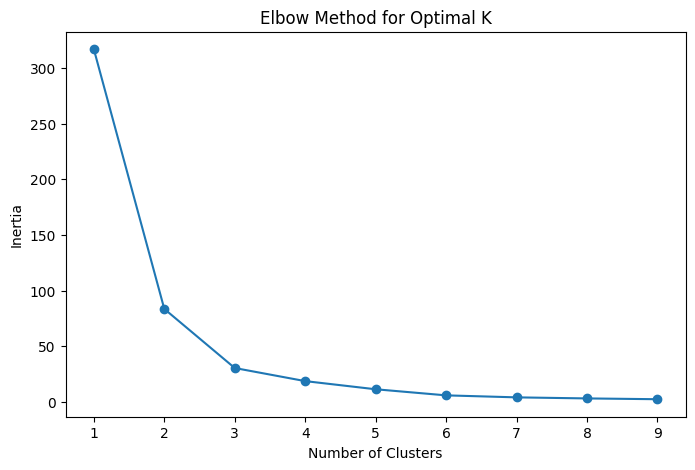

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize AvgSalesQuantity
scaler = StandardScaler()
product_avg_sales['Scaled_Sales'] = scaler.fit_transform(product_avg_sales[['AvgSalesQuantity']])

# Determine optimal clusters using the Elbow Method
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(product_avg_sales[['Scaled_Sales']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [34]:
# Choose k=3 based on elbow method
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
product_avg_sales['Cluster'] = kmeans.fit_predict(product_avg_sales[['Scaled_Sales']])

# Map cluster labels to "Fast", "Medium", "Slow"
cluster_map = {0: "Slow", 1: "Medium", 2: "Fast"}
product_avg_sales['ProductCluster'] = product_avg_sales['Cluster'].map(cluster_map)

product_avg_sales.head()

,ProductCode,AvgSalesQuantity,Scaled_Sales,Cluster,ProductCluster
0,1,0.155028,0.017927,0,Slow
1,2,0.116891,-0.126719,0,Slow
2,3,0.084998,-0.247682,0,Slow
3,4,0.103845,-0.176201,0,Slow
4,5,0.125320,-0.094748,0,Slow


In [35]:
product_avg_sales['ProductCluster'].value_counts()

ProductCluster
Slow      265
Fast       40
Medium     12
Name: count, dtype: int64

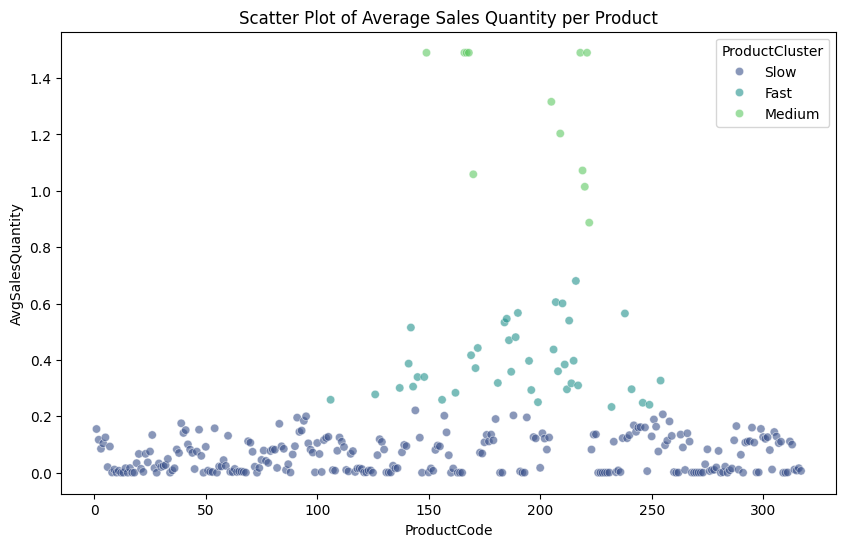

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of AvgSalesQuantity vs ProductCode with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_avg_sales, x='ProductCode', y='AvgSalesQuantity', hue='ProductCluster', palette='viridis', alpha=0.6)
plt.xlabel('ProductCode')
plt.ylabel('AvgSalesQuantity')
plt.title('Scatter Plot of Average Sales Quantity per Product')
plt.legend(title='ProductCluster')
plt.show()

### Separating Fast, Medium and Slow Stores for StoreCode 

In [37]:
store_avg_sales = train_nonpromo_data.groupby('StoreCode')['SalesQuantity'].mean().reset_index()
store_avg_sales.columns = ['StoreCode', 'AvgSalesQuantity']
store_avg_sales

,StoreCode,AvgSalesQuantity
0,1,0.182824
1,2,0.595069
2,3,0.119539
3,4,0.184322
4,5,0.149957
...,...,...
335,336,0.155720
336,337,0.201910
337,338,0.169765
338,339,0.237192


Outlier Analysis

In [38]:
import numpy as np
# Calculate mean and standard deviation of AvgSalesQuantity
mean_val = store_avg_sales['AvgSalesQuantity'].mean()
std_val = store_avg_sales['AvgSalesQuantity'].std()

# Compute Z-score for each value
store_avg_sales['Z_Score'] = (store_avg_sales['AvgSalesQuantity'] - mean_val) / std_val

# Identify outliers where |Z| > 3
outliers = store_avg_sales[abs(store_avg_sales['Z_Score']) > 3]

# Print results
print(f"Number of outliers: {len(outliers)}")
print(outliers[['StoreCode', 'AvgSalesQuantity', 'Z_Score']])

Number of outliers: 10
     StoreCode  AvgSalesQuantity   Z_Score
1            2          0.595069  3.780151
59          60          0.532277  3.213469
61          62          0.549407  3.368062
97          98          0.552174  3.393032
98          99          0.515940  3.066032
116        117          0.509755  3.010207
275        276          0.653455  4.307073
280        281          0.554165  3.411004
300        301          0.532947  3.219512
330        331          0.762931  5.295070


Cap outliers to the threshold values

In [39]:
import numpy as np

# Define upper and lower limits based on Z-score threshold (3 and -3)
upper_limit = mean_val + 3 * std_val
lower_limit = mean_val - 3 * std_val

# Cap outliers to the threshold values
store_avg_sales['AvgSalesQuantity'] = np.where(
    store_avg_sales['Z_Score'] > 3, upper_limit,
    np.where(store_avg_sales['Z_Score'] < -3, lower_limit, store_avg_sales['AvgSalesQuantity'])
)

# Drop Z-score column as it's no longer needed
store_avg_sales.drop(columns=['Z_Score'], inplace=True)


### Segmentation of Products into Fast/Medium/Slow Categories Using K-Means Clustering for Store

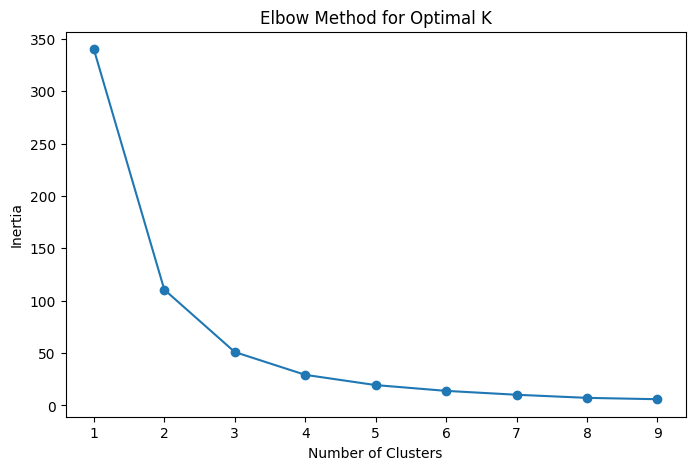

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize AvgSalesQuantity
scaler = StandardScaler()
store_avg_sales['Scaled_Sales'] = scaler.fit_transform(store_avg_sales[['AvgSalesQuantity']])

# Determine optimal clusters using the Elbow Method
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(store_avg_sales[['Scaled_Sales']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [41]:
# Choose k=3 based on elbow method
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
store_avg_sales['Cluster'] = kmeans.fit_predict(store_avg_sales[['Scaled_Sales']])

# Map cluster labels to "Fast", "Medium", "Slow"
cluster_map = {0: "Slow", 1: "Medium", 2: "Fast"}
store_avg_sales['StoreCluster'] = store_avg_sales['Cluster'].map(cluster_map)

# Display sample results
store_avg_sales.head()

,StoreCode,AvgSalesQuantity,Scaled_Sales,Cluster,StoreCluster
0,1,0.182824,0.083364,0,Slow
1,2,0.508624,3.243314,1,Medium
2,3,0.119539,-0.530445,0,Slow
3,4,0.184322,0.097893,0,Slow
4,5,0.149957,-0.235420,0,Slow


In [42]:
store_avg_sales['StoreCluster'].value_counts()

StoreCluster
Slow      244
Fast       75
Medium     21
Name: count, dtype: int64

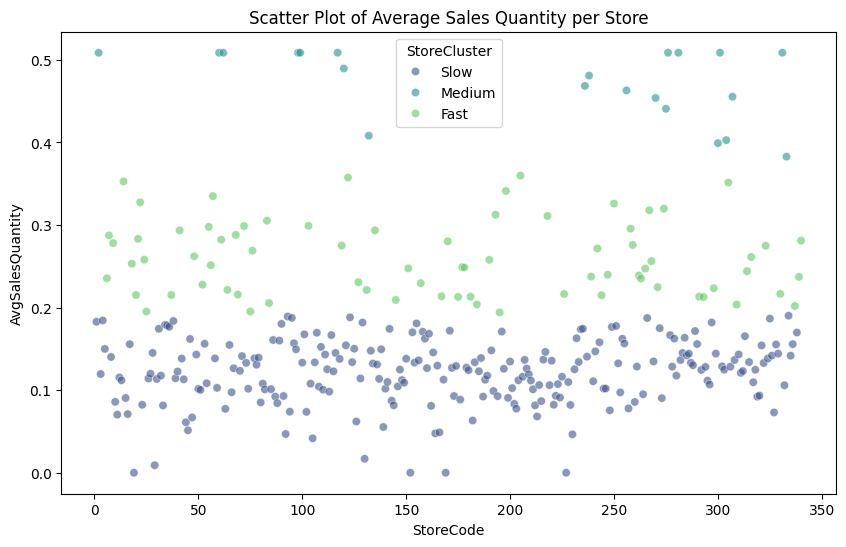

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of AvgSalesQuantity vs StoreCode with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_avg_sales, x='StoreCode', y='AvgSalesQuantity', hue='StoreCluster', palette='viridis', alpha=0.6)
plt.xlabel('StoreCode')
plt.ylabel('AvgSalesQuantity')
plt.title('Scatter Plot of Average Sales Quantity per Store')
plt.legend(title='StoreCluster')
plt.show()

### Which items experienced the biggest sale increase during promotions?

In [44]:
# Compute average sales per product during non-promotion periods
nonpromo_avg = train_nonpromo_data.groupby('ProductCode')['SalesQuantity'].mean().reset_index()
nonpromo_avg.rename(columns={'SalesQuantity': 'NonPromoAvgSales'}, inplace=True)

# Compute average sales per product during promotion periods
promo_avg = train_promo_data.groupby('ProductCode')['SalesQuantity'].mean().reset_index()
promo_avg.rename(columns={'SalesQuantity': 'PromoAvgSales'}, inplace=True)

# Merge both datasets on ProductCode
sales_comparison = promo_avg.merge(nonpromo_avg, on='ProductCode', how='left')

#Filter out records where non-promo sales are equal to zero.
sales_comparison = sales_comparison[sales_comparison['NonPromoAvgSales'] > 0]

# Calculate percentage sales increase
sales_comparison['SalesIncrease%'] = ((sales_comparison['PromoAvgSales'] - sales_comparison['NonPromoAvgSales']) /
                                      sales_comparison['NonPromoAvgSales']) * 100

# Sort products by the highest sales increase
sales_comparison = sales_comparison.sort_values(by='SalesIncrease%', ascending=False)

sales_comparison.head(10)

,ProductCode,PromoAvgSales,NonPromoAvgSales,SalesIncrease%
290,291,0.000267,0.000049,442.424242
12,13,0.000267,0.000099,171.212121
228,229,0.000624,0.000279,123.351159
121,122,0.003030,0.001610,88.188002
65,66,0.007308,0.003960,84.559286
229,230,0.000178,0.000099,80.808081
230,231,0.000891,0.000509,74.975562
281,282,0.003298,0.001955,68.652916
316,317,0.010784,0.006408,68.290598
33,34,0.000535,0.000329,62.727273


In [45]:
print(f"Rows: {sales_comparison[sales_comparison['NonPromoAvgSales'] > 0.01].shape[0]}")
sales_comparison[sales_comparison['NonPromoAvgSales'] > 0.01].sort_values(by='SalesIncrease%', ascending=False).head(10)

Rows: 229


,ProductCode,PromoAvgSales,NonPromoAvgSales,SalesIncrease%
29,30,0.032888,0.020309,61.937335
208,209,1.924866,1.203303,59.965267
277,278,0.016132,0.010171,58.608704
204,205,2.075223,1.315872,57.706983
217,218,7.484670,4.794611,56.105905
212,213,0.841800,0.539616,56.000030
218,219,1.671123,1.072149,55.866646
219,220,1.578877,1.014492,55.632235
216,217,0.481105,0.309645,55.373100
288,289,0.016578,0.010795,53.563028


Which items have cannibalized items in the same Productgroup1-ProductGroup2 combination?

In [46]:
# Compute average sales per product during non-promotion and promotion periods for each ProductGroup1-ProductGroup2 combination
promo_sales = train_promo_data.groupby(['ProductGroup1', 'ProductGroup2', 'ProductCode'])['SalesQuantity'].sum().reset_index()
nonpromo_sales = train_nonpromo_data.groupby(['ProductGroup1', 'ProductGroup2', 'ProductCode'])['SalesQuantity'].sum().reset_index()

# Merge the two datasets on ProductGroup1, ProductGroup2, and ProductCode
sales_comparison = promo_sales.merge(nonpromo_sales, on=['ProductGroup1', 'ProductGroup2', 'ProductCode'], how='left', suffixes=('_Promo', '_NonPromo'))

# Calculate sales difference during promotion periods (if negative, cannibalization may have occurred)
sales_comparison['SalesDifference'] = sales_comparison['SalesQuantity_Promo'] - sales_comparison['SalesQuantity_NonPromo']

# Identify cannibalization (where sales decrease in promo period)
cannibalized_items = sales_comparison[sales_comparison['SalesDifference'] < 0]
cannibalized_items.head()

,ProductGroup1,ProductGroup2,ProductCode,SalesQuantity_Promo,SalesQuantity_NonPromo,SalesDifference
0,A,5,1,1964,9435,-7471
1,A,5,2,1472,7114,-5642
2,A,5,3,1254,5173,-3919
3,A,5,4,1238,6320,-5082
4,A,5,5,1637,7627,-5990


Cross-Product Cannibalization Check (Train)

In [109]:
# Group sales data by ProductGroup1, ProductGroup2, and ProductCode for both promo and non-promo periods
promo_sales = train_promo_data.groupby(['ProductGroup1', 'ProductGroup2', 'ProductCode'])['SalesQuantity'].sum().reset_index()
nonpromo_sales = train_nonpromo_data.groupby(['ProductGroup1', 'ProductGroup2', 'ProductCode'])['SalesQuantity'].sum().reset_index()

# Merge promo and non-promo sales side by side for comparison
sales_comparison = promo_sales.merge(
    nonpromo_sales,
    on=['ProductGroup1', 'ProductGroup2', 'ProductCode'],
    how='inner',
    suffixes=('_Promo', '_NonPromo')
)

# Identify products where promo sales decreased compared to non-promo period (potential cannibalization)
sales_comparison['SalesDifference'] = sales_comparison['SalesQuantity_Promo'] - sales_comparison['SalesQuantity_NonPromo']
cannibalized_items = sales_comparison[sales_comparison['SalesDifference'] < 0].copy()

# Display top 50 products with the highest sales decline
print("Cannibalized Products in the Same Group:")
display(cannibalized_items.sort_values('SalesDifference').head(50))


Cannibalized Products in the Same Group:


,ProductGroup1,ProductGroup2,ProductCode,SalesQuantity_Promo,SalesQuantity_NonPromo,SalesDifference
39,A,5,218,83978,291800,-207822
200,G,4,168,39669,200113,-160444
199,G,4,167,29579,143251,-113672
42,A,5,221,43743,156216,-112473
198,G,4,166,27010,133475,-106465
111,C,12,149,23481,118955,-95474
26,A,5,205,23284,80084,-56800
30,A,5,209,21597,73233,-51636
202,G,4,170,13973,64428,-50455
40,A,5,219,18750,65251,-46501


### Are there stores that have higher promotion reaction?

In [47]:
#  Calculate average sales per store during non-promotion periods
store_nonpromo_avg = train_nonpromo_data.groupby('StoreCode')['SalesQuantity'].mean().reset_index()
store_nonpromo_avg.rename(columns={'SalesQuantity': 'NonPromoAvgSales'}, inplace=True)

# Calculate average sales per store during promotion periods
store_promo_avg = train_promo_data.groupby('StoreCode')['SalesQuantity'].mean().reset_index()
store_promo_avg.rename(columns={'SalesQuantity': 'PromoAvgSales'}, inplace=True)

# Merge both datasets to compare before and during promotion sales
store_sales_comparison = store_promo_avg.merge(store_nonpromo_avg, on='StoreCode', how='left')

# Calculate the percentage increase in sales for each store
# Formula: (Promo - NonPromo) / NonPromo * 100
store_sales_comparison['SalesIncrease%'] = (
    (store_sales_comparison['PromoAvgSales'] - store_sales_comparison['NonPromoAvgSales']) /
    store_sales_comparison['NonPromoAvgSales']
) * 100

# Remove stores with 0 non-promo sales to avoid division by zero or infinite % increases
store_sales_comparison = store_sales_comparison[store_sales_comparison['NonPromoAvgSales'] > 0]

# Sort stores by sales increase to identify top-performing stores during promotion
store_sales_comparison = store_sales_comparison.sort_values(by='SalesIncrease%', ascending=False)

# Display the top 10 stores with highest promotion reaction
store_sales_comparison.head(10)


,StoreCode,PromoAvgSales,NonPromoAvgSales,SalesIncrease%
91,92,0.106491,0.046913,126.994968
163,164,0.081637,0.047671,71.249650
144,145,0.355989,0.209224,70.147227
182,183,0.222063,0.133814,65.949100
188,189,0.192525,0.117548,63.784471
26,27,0.195392,0.119927,62.926547
283,284,0.261734,0.163456,60.124806
104,105,0.066724,0.041679,60.089692
276,277,0.266036,0.166628,59.658029
29,30,0.181149,0.113565,59.511785


In [48]:
# Identify the segment each store belongs to (Slow / Medium / Fast)
store_sales_comparison = store_sales_comparison.merge(store_avg_sales, on='StoreCode', how='left')
store_sales_comparison[['StoreCode', 'PromoAvgSales', 'NonPromoAvgSales', 'SalesIncrease%', 'StoreCluster']].sort_values(by='SalesIncrease%', ascending=False).head(10)

,StoreCode,PromoAvgSales,NonPromoAvgSales,SalesIncrease%,StoreCluster
0,92,0.106491,0.046913,126.994968,Slow
1,164,0.081637,0.047671,71.249650,Slow
2,145,0.355989,0.209224,70.147227,Fast
3,183,0.222063,0.133814,65.949100,Slow
4,189,0.192525,0.117548,63.784471,Slow
5,27,0.195392,0.119927,62.926547,Slow
6,284,0.261734,0.163456,60.124806,Slow
7,105,0.066724,0.041679,60.089692,Slow
8,277,0.266036,0.166628,59.658029,Slow
9,30,0.181149,0.113565,59.511785,Slow


Is there any significant difference between promotion impacts of the Fast versus Slow items?

In [51]:
from scipy.stats import ttest_ind
import pandas as pd

# Merge product cluster into sales comparison dataset
ProductClusters = product_avg_sales[['ProductCode', 'ProductCluster']]

# Compute average sales during promo and non-promo per product
promo_avg = train_promo_data.groupby('ProductCode')['SalesQuantity'].mean().reset_index()
promo_avg.columns = ['ProductCode', 'PromoAvgSales']

nonpromo_avg = train_nonpromo_data.groupby('ProductCode')['SalesQuantity'].mean().reset_index()
nonpromo_avg.columns = ['ProductCode', 'NonPromoAvgSales']

#  Merge and calculate % increase
sales_effect = pd.merge(promo_avg, nonpromo_avg, on='ProductCode', how='inner')
sales_effect = pd.merge(sales_effect, ProductClusters, on='ProductCode', how='left')

# Remove products with zero non-promo average (avoid division by zero)
sales_effect = sales_effect[sales_effect['NonPromoAvgSales'] > 0]

# Calculate % increase
sales_effect['SalesIncrease%'] = (
    (sales_effect['PromoAvgSales'] - sales_effect['NonPromoAvgSales']) / sales_effect['NonPromoAvgSales']
) * 100

# Split into Fast and Slow groups
fast_items = sales_effect[sales_effect['ProductCluster'] == 'Fast']['SalesIncrease%']
slow_items = sales_effect[sales_effect['ProductCluster'] == 'Slow']['SalesIncrease%']

# Perform t-test
t_stat, p_value = ttest_ind(fast_items, slow_items, equal_var=False)


print(f"Mean Sales Increase - Fast Items: {fast_items.mean():.2f}%")
print(f"Mean Sales Increase - Slow Items: {slow_items.mean():.2f}%")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print(" There is a statistically significant difference between Fast and Slow items.")
else:
    print(" There is no statistically significant difference between Fast and Slow items.")


Mean Sales Increase - Fast Items: 29.44%
Mean Sales Increase - Slow Items: 18.83%
T-Statistic: 2.3005
P-Value: 0.0239
 There is a statistically significant difference between Fast and Slow items.


Is there any significant difference between promotion impacts of the Fast versus Slow stores?

In [52]:
from scipy.stats import ttest_ind

# Average promo and non-promo sales per store
promo_avg = train_promo_data.groupby('StoreCode')['SalesQuantity'].mean().reset_index()
promo_avg.columns = ['StoreCode', 'PromoAvgSales']

nonpromo_avg = train_nonpromo_data.groupby('StoreCode')['SalesQuantity'].mean().reset_index()
nonpromo_avg.columns = ['StoreCode', 'NonPromoAvgSales']

# Merge and calculate % increase
sales_effect = pd.merge(promo_avg, nonpromo_avg, on='StoreCode', how='inner')
sales_effect = pd.merge(sales_effect, store_avg_sales, on='StoreCode', how='left') 

# Remove stores with zero non-promo avg (avoid division by zero)
sales_effect = sales_effect[sales_effect['NonPromoAvgSales'] > 0]

# Calculate sales increase percentage
sales_effect['SalesIncrease%'] = (
    (sales_effect['PromoAvgSales'] - sales_effect['NonPromoAvgSales']) / sales_effect['NonPromoAvgSales']
) * 100

# Split into Fast and Slow stores
fast_stores = sales_effect[sales_effect['StoreCluster'] == 'Fast']['SalesIncrease%']
slow_stores = sales_effect[sales_effect['StoreCluster'] == 'Slow']['SalesIncrease%']

# Perform t-test
t_stat, p_value = ttest_ind(fast_stores, slow_stores, equal_var=False)


print(f"Mean Sales Increase - Fast Stores: {fast_stores.mean():.2f}%")
print(f"Mean Sales Increase - Slow Stores: {slow_stores.mean():.2f}%")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant difference between Fast and Slow stores.")
else:
    print("There is no statistically significant difference between Fast and Slow stores.")


Mean Sales Increase - Fast Stores: 33.13%
Mean Sales Increase - Slow Stores: 26.52%
T-Statistic: 2.9845
P-Value: 0.0033
There is a statistically significant difference between Fast and Slow stores.


## **Model**

In [110]:
test_promotion_dates = promotion_dates[4:5]  # Sadece Promo5
test_promotion_dates

,Period,StartDate,EndDate
4,Promo5,2015-09-01 00:00:00,2015-09-06 00:00:00


In [111]:
print(f"Unique product group 1 count: {product_groups['ProductGroup1'].nunique()}")
print(f"Unique product group 2 count: {product_groups['ProductGroup2'].nunique()}")

Unique product group 1 count: 10
Unique product group 2 count: 30


###  XGBoost Model: Predicting Promo Sales with Frequency Encoded Product Groups

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import xgboost as xgb
import numpy as np

# 1. Calculate average sales for pre-promotion and promotion periods
prepromo_sales = train_nonpromo_data.groupby(
    ['ProductCode', 'StoreCode', 'ProductGroup1', 'ProductGroup2']
)['SalesQuantity'].mean().reset_index()
prepromo_sales.rename(columns={'SalesQuantity': 'PrePromoAvg'}, inplace=True)

promo_sales = train_promo_data.groupby(
    ['ProductCode', 'StoreCode', 'ProductGroup1', 'ProductGroup2']
)['SalesQuantity'].mean().reset_index()
promo_sales.rename(columns={'SalesQuantity': 'PromoAvg'}, inplace=True)

# 2. Merge pre-promotion and promotion sales
model_data = pd.merge(
    prepromo_sales,
    promo_sales,
    on=['ProductCode', 'StoreCode', 'ProductGroup1', 'ProductGroup2'],
    how='inner'
)

# 3. Frequency Encoding for categorical features
for col in ['ProductGroup1', 'ProductGroup2']:
    freq = model_data[col].value_counts(normalize=True)
    model_data[f'{col}_FreqEnc'] = model_data[col].map(freq)

# 4. Define features (X) and target (y)
X = model_data[['ProductCode', 'StoreCode', 'PrePromoAvg', 'ProductGroup1_FreqEnc', 'ProductGroup2_FreqEnc']]
y = model_data['PromoAvg']

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. XGBoost regression model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# 7. Predictions and metrics
y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Adjusted MAPE (exclude zero values)
non_zero_mask = y_test > 0
filtered_y_test = y_test[non_zero_mask]
filtered_y_pred = y_pred[non_zero_mask]
mape = mean_absolute_percentage_error(filtered_y_test, filtered_y_pred) * 100


# ---- PROMO5 Toplam Satış vs Tahmin ----
actual_total_promo5_sales = y_test.sum()
predicted_total_promo5_sales = y_pred.sum()

print("Promo5 Sales Summary")
print(f"🟢 Actual Total Sales during Promo5: {actual_total_promo5_sales:.2f}")
print(f"🔵 Predicted Total Sales by Model:   {predicted_total_promo5_sales:.2f}")
print(f"   Difference: {(predicted_total_promo5_sales - actual_total_promo5_sales):.2f}")


# MAPE for predictions where actual values are above a threshold
threshold = 0.5
mask = y_test > threshold
mape_filtered = mean_absolute_percentage_error(y_test[mask], y_pred[mask]) * 100

# 8. Print results
print("Model Performance Metrics")
print(f" R² Score: {r2:.4f}")
print(f" MAE: {mae:.4f}")
print(f" MSE: {mse:.4f}")
print(f" Adjusted MAPE (y > 0): {mape:.2f}%")
print(f" Filtered MAPE (y > {threshold}): {mape_filtered:.2f}%")


Promo5 Sales Summary
🟢 Actual Total Sales during Promo5: 4983.15
🔵 Predicted Total Sales by Model:   5014.14
   Difference: 30.99
Model Performance Metrics
 R² Score: 0.7240
 MAE: 0.1254
 MSE: 0.2490
 Adjusted MAPE (y > 0): 87.73%
 Filtered MAPE (y > 0.5): 43.98%


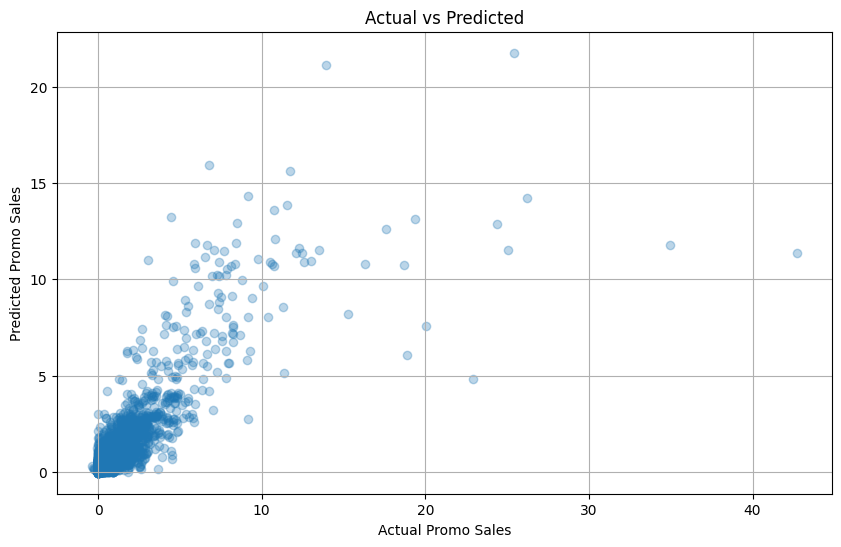

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Promo Sales")
plt.ylabel("Predicted Promo Sales")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


#### XGBoost Feature Importance Based on Frequency Encoded Inputs

What is the biggest effect explaining sales change during promotions?

 Feature Importances:
                 Feature  Importance
2            PrePromoAvg    0.821249
1              StoreCode    0.060503
0            ProductCode    0.054052
4  ProductGroup2_FreqEnc    0.038918
3  ProductGroup1_FreqEnc    0.025279


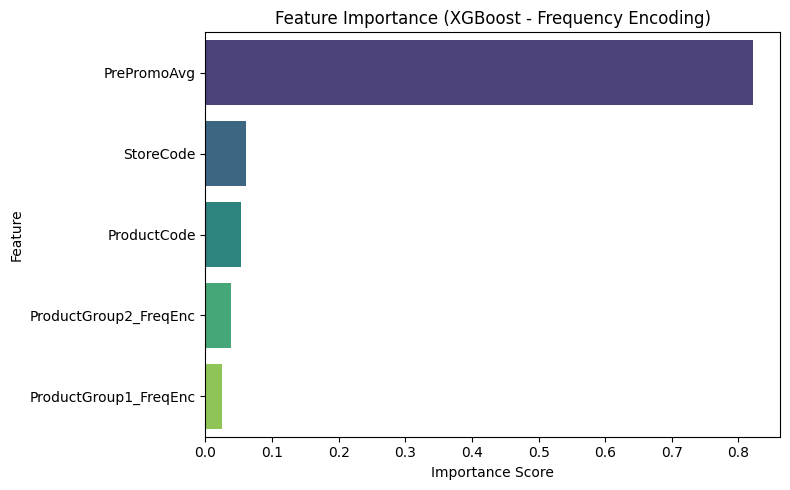

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance for the frequency-encoded model
used_features = ['ProductCode', 'StoreCode', 'PrePromoAvg', 'ProductGroup1_FreqEnc', 'ProductGroup2_FreqEnc']
importance_df = pd.DataFrame({
    'Feature': used_features,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(" Feature Importances:")
print(importance_df)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance (XGBoost - Frequency Encoding)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Evaluating Model Performance with Learning Curve and Residuals

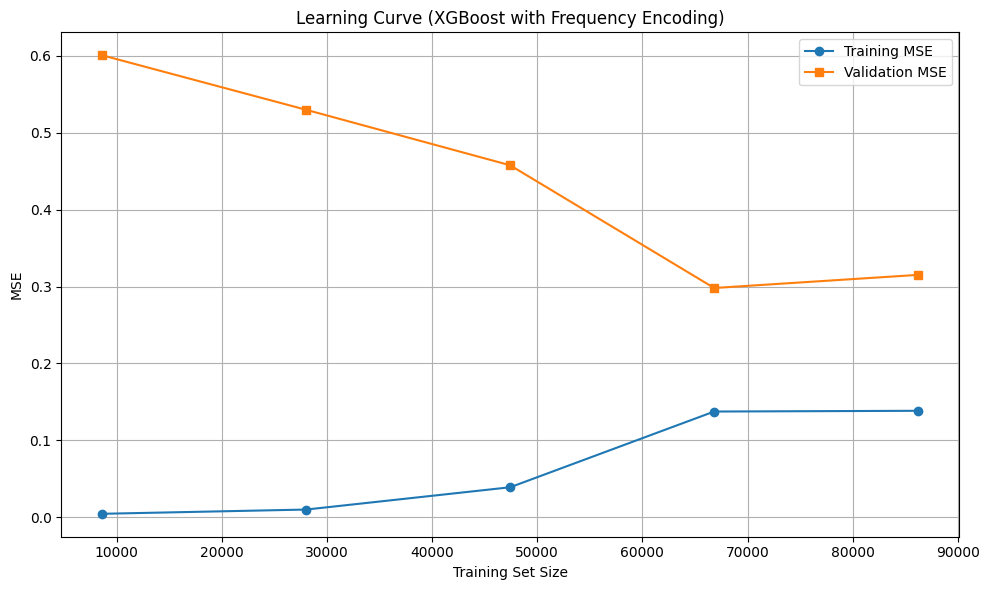

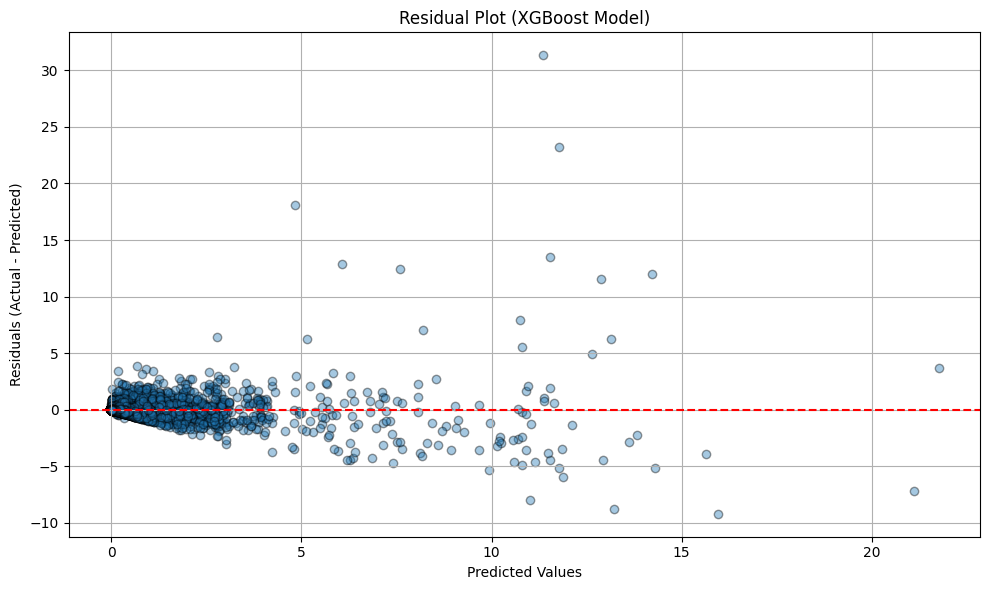

In [58]:
import xgboost as xgb
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 2. Compute the learning curve (MSE)
train_sizes, train_scores, val_scores = learning_curve(
    xgb_model, X, y,
    cv=5,
    scoring='neg_mean_squared_error',  # Still uses negative MSE internally
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_mse = -train_scores.mean(axis=1)
val_mse = -val_scores.mean(axis=1)

# 3. Plot the learning curve (MSE)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mse, marker='o', label='Training MSE')
plt.plot(train_sizes, val_mse, marker='s', label='Validation MSE')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve (XGBoost with Frequency Encoding)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Fit the model on training data
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# 5. Residual plot
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.4, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (XGBoost Model)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Analyzing the Cannibalization Effect on Product Sales During Promo5

In [118]:
# 1. Define Promo5 and Pre-Promo5 date ranges
promo5_start = pd.to_datetime("2015-09-01")
promo5_end = pd.to_datetime("2015-09-06")
prepromo5_start = pd.to_datetime("2015-08-01")
prepromo5_end = pd.to_datetime("2015-08-31")

# 2. Filter Promo5 and PrePromo5 data
promo5_data = test_data[(test_data['Date'] >= promo5_start) & (test_data['Date'] <= promo5_end)].copy()
pre_promo5_data = test_data[(test_data['Date'] >= prepromo5_start) & (test_data['Date'] <= prepromo5_end)].copy()

# 3. Calculate total sales per product in both periods
promo5_sales = promo5_data.groupby(['ProductGroup1', 'ProductGroup2', 'ProductCode'])['SalesQuantity'].sum().reset_index()
promo5_sales.rename(columns={'SalesQuantity': 'Promo5Sales'}, inplace=True)

prepromo5_sales = pre_promo5_data.groupby(['ProductGroup1', 'ProductGroup2', 'ProductCode'])['SalesQuantity'].sum().reset_index()
prepromo5_sales.rename(columns={'SalesQuantity': 'PrePromoSales'}, inplace=True)

# 4. Merge the two sales periods
cannibalization_df = pd.merge(prepromo5_sales, promo5_sales,
                              on=['ProductGroup1', 'ProductGroup2', 'ProductCode'],
                              how='inner')

# 5. Calculate sales difference and percentage change
cannibalization_df['SalesDifference'] = cannibalization_df['Promo5Sales'] - cannibalization_df['PrePromoSales']
cannibalization_df['Change%'] = (cannibalization_df['SalesDifference'] / cannibalization_df['PrePromoSales']) * 100

# 6. Sort and display top 10 cannibalized products (biggest decrease in sales)
cannibalization_df.sort_values(by='Change%', inplace=True)
print("🔻 Top 10 Cannibalized Products (Biggest Drop in Sales from August to Promo5):")
display(cannibalization_df.head(10))

# 7. Optional: Summary Stats
total_pre = cannibalization_df['PrePromoSales'].sum()
total_promo = cannibalization_df['Promo5Sales'].sum()
print(f"\n Total Sales Before Promo5 (August): {total_pre}")
print(f" Total Sales During Promo5: {total_promo}")
print(f" Net Change: {total_promo - total_pre} ({((total_promo - total_pre)/total_pre)*100:.2f}%)")


🔻 Top 10 Cannibalized Products (Biggest Drop in Sales from August to Promo5):


,ProductGroup1,ProductGroup2,ProductCode,PrePromoSales,Promo5Sales,SalesDifference,Change%
8,A,5,110,-2,2,4,-200.0
265,I,10,160,-3,0,3,-100.0
213,G,24,88,2,0,-2,-100.0
276,I,27,311,13,0,-13,-100.0
121,D,29,131,3,0,-3,-100.0
289,J,22,163,1,0,-1,-100.0
101,B,1,193,1,0,-1,-100.0
226,G,24,310,-1,0,1,-100.0
7,A,5,109,10,0,-10,-100.0
140,E,14,34,3,0,-3,-100.0



 Total Sales Before Promo5 (August): 498411
 Total Sales During Promo5: 112676
 Net Change: -385735 (-77.39%)


# Encoding and Merging Pre-Promotion and Promo5 Sales Data for Model Evaluation

In [120]:
# Promo5 and PrePromo5 date ranges
promo5_start = pd.to_datetime("2015-09-01")
promo5_end = pd.to_datetime("2015-09-06")
prepromo5_start = pd.to_datetime("2015-08-01")
prepromo5_end = pd.to_datetime("2015-08-31")

# Filter pre-promo and promo5 periods
pre_promo5_data = test_data[(test_data['Date'] >= prepromo5_start) & (test_data['Date'] <= prepromo5_end)].copy()
promo5_data = test_data[(test_data['Date'] >= promo5_start) & (test_data['Date'] <= promo5_end)].copy()

# Group and calculate average sales
prepromo5_sales = pre_promo5_data.groupby(['ProductCode', 'StoreCode', 'ProductGroup1', 'ProductGroup2'])['SalesQuantity'].mean().reset_index()
prepromo5_sales.rename(columns={'SalesQuantity': 'PrePromoAvg'}, inplace=True)

promo5_sales = promo5_data.groupby(['ProductCode', 'StoreCode', 'ProductGroup1', 'ProductGroup2'])['SalesQuantity'].mean().reset_index()
promo5_sales.rename(columns={'SalesQuantity': 'Promo5Sales'}, inplace=True)

# Merge both periods
test_model_data = pd.merge(prepromo5_sales, promo5_sales, on=['ProductCode', 'StoreCode', 'ProductGroup1', 'ProductGroup2'], how='inner')

# Frequency Encoding
for col in ['ProductGroup1', 'ProductGroup2']:
    freq = test_model_data[col].value_counts(normalize=True)
    test_model_data[f'{col}_FreqEnc'] = test_model_data[col].map(freq)

# Feature matrix (X) and target (y)
X_test_promo5 = test_model_data[['ProductCode', 'StoreCode', 'PrePromoAvg', 'ProductGroup1_FreqEnc', 'ProductGroup2_FreqEnc']]
y_test_promo5 = test_model_data['Promo5Sales']

# Predictions and metrics
y_pred_promo5 = xgb_model.predict(X_test_promo5)
r2_promo5 = r2_score(y_test_promo5, y_pred_promo5)
mae_promo5 = mean_absolute_error(y_test_promo5, y_pred_promo5)
mse_promo5 = mean_squared_error(y_test_promo5, y_pred_promo5)
mape_promo5 = mean_absolute_percentage_error(y_test_promo5[y_test_promo5 > 0], y_pred_promo5[y_test_promo5 > 0]) * 100

# Print results
print("🔵 Promo5 Test Results:")
print(f" R² Score: {r2_promo5:.4f}")
print(f" MAE: {mae_promo5:.4f}")
print(f" MSE: {mse_promo5:.4f}")
print(f" Adjusted MAPE (y > 0): {mape_promo5:.2f}%")


🔵 Promo5 Test Results:
 R² Score: 0.3625
 MAE: 0.2178
 MSE: 0.5141
 Adjusted MAPE (y > 0): 99.24%


# BONUS: Analyzing Return Transactions During and After Promotions

Is there any significant difference in item return rates after promotions?

In [123]:

# Prepare return summary for each promotion


promo_return_summary = []

for _, row in train_promotion_dates.iterrows():
    promo_name = row['Period']
    promo_start = pd.to_datetime(row['StartDate'])
    promo_end = pd.to_datetime(row['EndDate'])
    after_promo_start = promo_end + pd.Timedelta(days=1)
    after_promo_end = promo_end + pd.Timedelta(days=30)

    # Returns during the promo (SalesQuantity < 0)
    during_returns = test_data[
        (test_data['Date'] >= promo_start) &
        (test_data['Date'] <= promo_end) &
        (test_data['SalesQuantity'] < 0)
    ]
    
    # Returns after the promo
    after_returns = test_data[
        (test_data['Date'] >= after_promo_start) &
        (test_data['Date'] <= after_promo_end) &
        (test_data['SalesQuantity'] < 0)
    ]

    promo_return_summary.append({
        'Promo': promo_name,
        'DuringPromoReturns': during_returns['SalesQuantity'].sum(),
        'DuringPromoCount': len(during_returns),
        'AfterPromoReturns': after_returns['SalesQuantity'].sum(),
        'AfterPromoCount': len(after_returns)
    })

# Create DataFrame
return_df = pd.DataFrame(promo_return_summary)


print(" Return Summary by Promotion:")
print(return_df)


 Return Summary by Promotion:
    Promo  DuringPromoReturns  DuringPromoCount  AfterPromoReturns  \
0  Promo1                   0                 0                  0   
1  Promo2                   0                 0                  0   
2  Promo3                   0                 0                  0   
3  Promo4                   0                 0                  0   

   AfterPromoCount  
0                0  
1                0  
2                0  
3                0  


In [85]:
test_data['Date'].min(), test_data['Date'].max()


(Timestamp('2015-08-01 00:00:00'), Timestamp('2016-01-01 00:00:00'))

Test için 

In [105]:
print(test_promotion_dates)

    Period  StartDate    EndDate
4   Promo5 2015-09-01 2015-09-06
5  Promo6  2015-11-20 2015-11-27


 [Test Data] Return Summary by Promotion:
     Promo  DuringPromoReturns  DuringPromoCount  AfterPromoReturns  \
0   Promo5                -333               183              -2627   
1  Promo6                 -448               219              -1687   

   AfterPromoCount  
0             1055  
1              746  


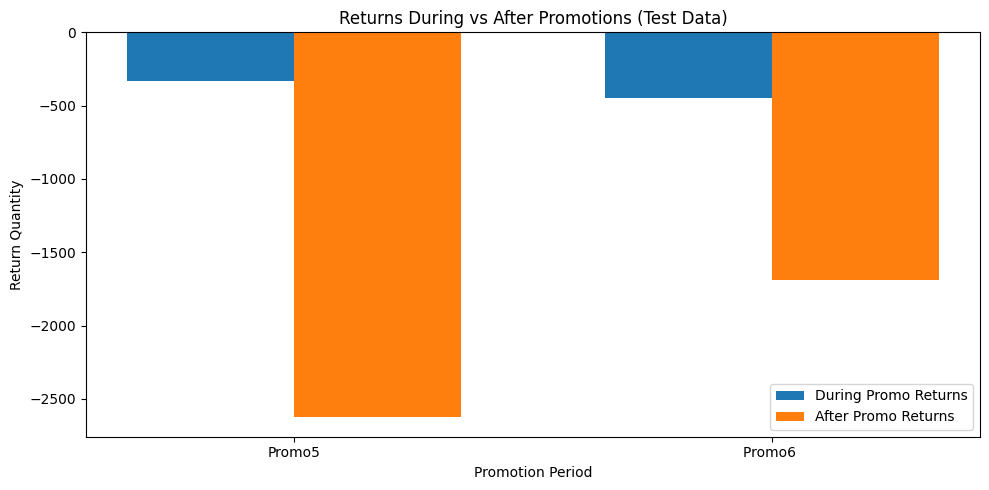

In [124]:


#  Ensure date format is correct
test_data['Date'] = pd.to_datetime(test_data['Date'])
test_promotion_dates['StartDate'] = pd.to_datetime(test_promotion_dates['StartDate'])
test_promotion_dates['EndDate'] = pd.to_datetime(test_promotion_dates['EndDate'])

# Initialize list to store summary data
test_summary = []

#  Loop through each test promotion period
for _, row in test_promotion_dates.iterrows():
    promo = row['Period']
    start = row['StartDate']
    end = row['EndDate']
    after_start = end + pd.Timedelta(days=1)
    after_end = end + pd.Timedelta(days=30)

    # During promo
    during = test_data[
        (test_data['Date'] >= start) &
        (test_data['Date'] <= end) &
        (test_data['SalesQuantity'] < 0)
    ]
    
    # After promo
    after = test_data[
        (test_data['Date'] >= after_start) &
        (test_data['Date'] <= after_end) &
        (test_data['SalesQuantity'] < 0)
    ]

    test_summary.append({
        'Promo': promo,
        'DuringPromoReturns': during['SalesQuantity'].sum(),
        'DuringPromoCount': len(during),
        'AfterPromoReturns': after['SalesQuantity'].sum(),
        'AfterPromoCount': len(after)
    })

#  Create DataFrame
test_return_df = pd.DataFrame(test_summary)

#  Show summary
print(" [Test Data] Return Summary by Promotion:")
print(test_return_df)

#  Plot results
plt.figure(figsize=(10, 5))
bar_width = 0.35
x = range(len(test_return_df))

plt.bar(x, test_return_df['DuringPromoReturns'], width=bar_width, label='During Promo Returns')
plt.bar([i + bar_width for i in x], test_return_df['AfterPromoReturns'], width=bar_width, label='After Promo Returns')
plt.xticks([i + bar_width / 2 for i in x], test_return_df['Promo'])
plt.xlabel('Promotion Period')
plt.ylabel('Return Quantity')
plt.title('Returns During vs After Promotions (Test Data)')
plt.legend()
plt.tight_layout()
plt.show()
